## Imports

In [36]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt

from utilities import convert_dayofyear_to_month_day

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Loading Training Data

In [37]:
data_dir = "./data"

# Load the data
df = pd.read_csv(os.path.join(data_dir, "train.csv"))

# Converting day to month, day, day of the week
convert_dayofyear_to_month_day(df, 'day')

display(df.head(30))
display(df.info())

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall,month,day_of_month
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1,1,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1,1,2
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1,1,3
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1,1,4
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0,1,5
5,5,6,1022.7,20.6,18.6,16.5,12.5,79.0,81.0,0.0,20.0,15.7,1,1,6
6,6,7,1022.8,19.5,18.4,15.3,11.3,56.0,46.0,7.6,20.0,28.4,0,1,7
7,7,8,1019.7,15.8,13.6,12.7,11.8,96.0,100.0,0.0,50.0,52.8,1,1,8
8,8,9,1017.4,17.6,16.5,15.6,12.5,86.0,100.0,0.0,50.0,37.5,1,1,9
9,9,10,1025.4,16.5,14.4,12.0,8.6,77.0,84.0,1.0,50.0,38.3,0,1,10


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2190 non-null   int64  
 1   day            2190 non-null   int64  
 2   pressure       2190 non-null   float64
 3   maxtemp        2190 non-null   float64
 4   temparature    2190 non-null   float64
 5   mintemp        2190 non-null   float64
 6   dewpoint       2190 non-null   float64
 7   humidity       2190 non-null   float64
 8   cloud          2190 non-null   float64
 9   sunshine       2190 non-null   float64
 10  winddirection  2190 non-null   float64
 11  windspeed      2190 non-null   float64
 12  rainfall       2190 non-null   int64  
 13  month          2190 non-null   int64  
 14  day_of_month   2190 non-null   int64  
dtypes: float64(10), int64(5)
memory usage: 256.8 KB


None

## Plotting distributions of Each Column Based on Rain

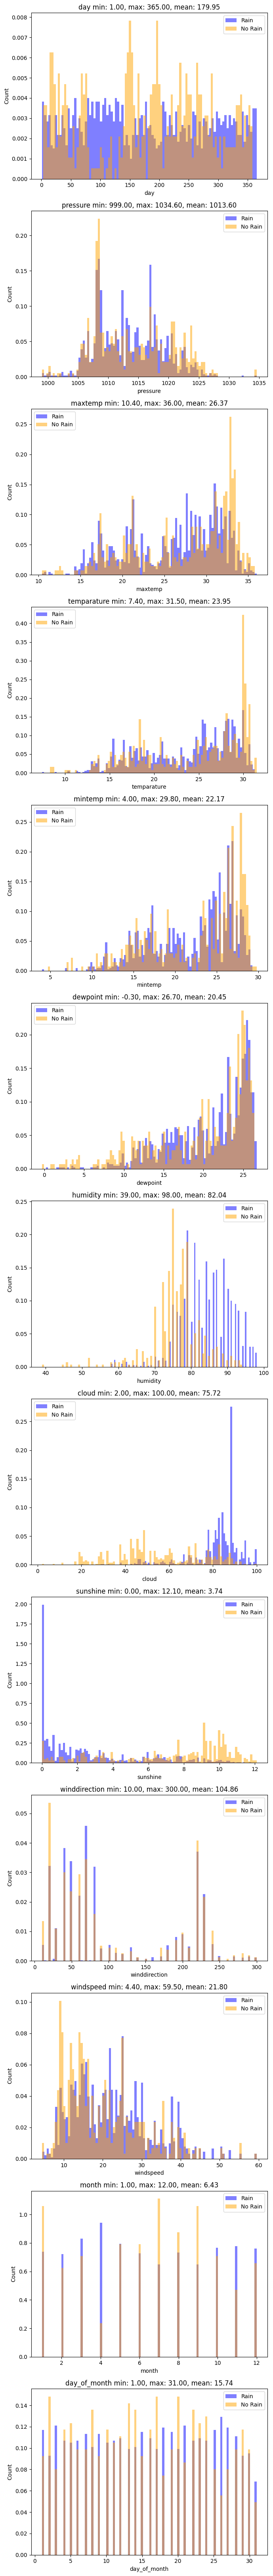

In [38]:
plot_cols = df.columns
plot_cols = [col for col in plot_cols if col != "id" and col != "rainfall"]

fig, axs = plt.subplots(len(plot_cols),1, figsize=(7, len(plot_cols)*5))

for i, col in enumerate(plot_cols):
    if df[col].dtype == "object":
        continue
    
    # Extracting columns with and without rain

    rain_col = df[df["rainfall"] > 0][col]
    no_rain_col = df[df["rainfall"] == 0][col]

    # Plotting the histograms
    axs[i].hist(rain_col, bins=100, alpha=0.5, color='blue', label='Rain', density=True)
    axs[i].hist(no_rain_col, bins=100, alpha=0.5, color='orange', label='No Rain', density=True)

    axs[i].set_title(col + f" min: {df[col].min():.2f}, max: {df[col].max():.2f}, mean: {df[col].mean():.2f}")
    axs[i].set_xlabel(col)
    axs[i].set_ylabel("Count")
    axs[i].legend()

plt.tight_layout()
plt.show() 



Seems as thought the classes are most seperable on the Humidity and Sunshine columns. Temperature is also a good indicator because higher temps usually mean less humidity but we will verify that in the following analysis. We also see that the month is a very useful metric for determining if it will rain or not.

## Seeing rainfall based on month and day

Expected accuracy for a model that predicts no rain at all: 24.66%
Expected accuracy for a model that predicts rain all the time: 75.34%


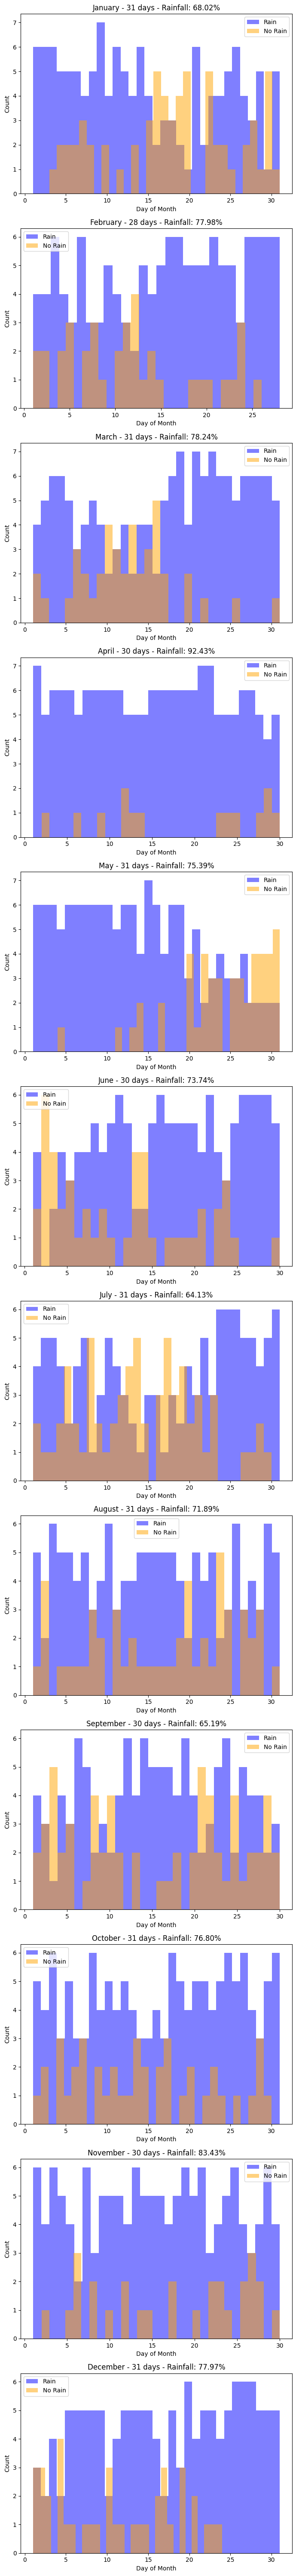

In [39]:
num_months = 12

month_names = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]


fig, axs = plt.subplots(num_months, 1, figsize=(7, num_months*5))
rain_percentages = []

for i in range(1, num_months+1):
    month_df = df[df["month"] == i]
    num_days = month_df["day_of_month"].max()

    rain_col = month_df[month_df["rainfall"] > 0]["day_of_month"]
    no_rain_col = month_df[month_df["rainfall"] == 0]["day_of_month"]

    rain_perc = len(rain_col) / (len(rain_col) + len(no_rain_col))

    axs[i-1].hist(rain_col, bins=num_days, alpha=0.5, color='blue', label='Rain')
    axs[i-1].hist(no_rain_col, bins=num_days, alpha=0.5, color='orange', label='No Rain')
    axs[i-1].set_title(f"{month_names[i-1]} - {num_days} days - Rainfall: {rain_perc:.2%}")
    axs[i-1].set_xlabel("Day of Month")
    axs[i-1].set_ylabel("Count")
    axs[i-1].legend()

print("Expected accuracy for a model that predicts no rain at all: {:.2%}".format(1 - df["rainfall"].mean() / df["rainfall"].max()))
print("Expected accuracy for a model that predicts rain all the time: {:.2%}".format(df["rainfall"].mean() / df["rainfall"].max()))

plt.tight_layout()
plt.show()

This shows it is much more likely to rain for any given month than it is not to rain. This indicates there is a class imbalance and must be taken into account when validating models. (As 75% accuracy can be acheived by only predicting rainfall)

## Autocorrelation Analysis

/home/codygrogan/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/codygrogan/.local/lib/python3.12/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


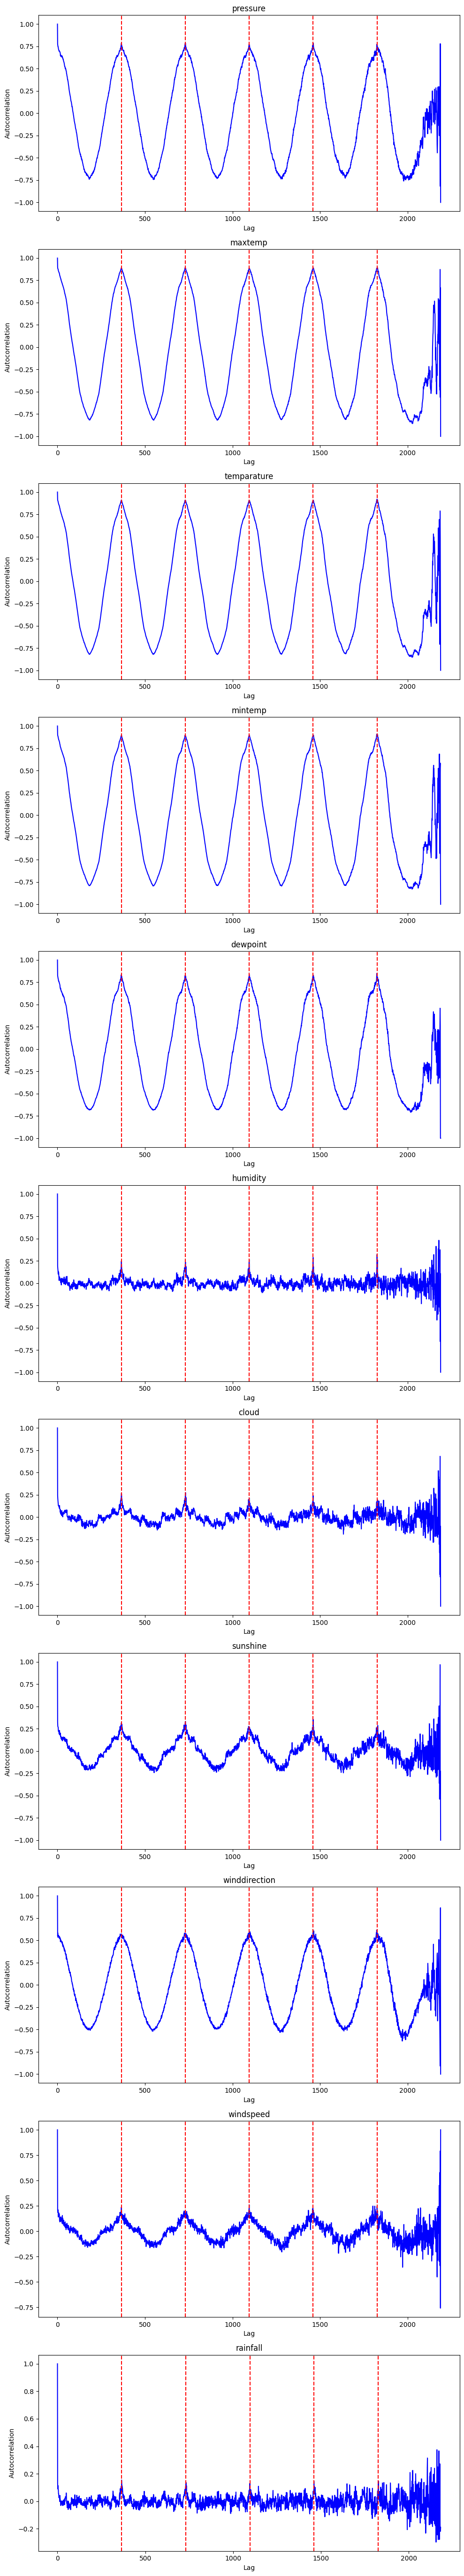

In [40]:
non_date_cols = [i for i in df.columns if i not in ["id", "day", "month", "day_of_month", "day_of_week"]]

fig, axs = plt.subplots(len(non_date_cols),1, figsize=(10, len(non_date_cols)*5))

for i,col in enumerate(non_date_cols):
    if df[col].dtype == "object":
        continue
    
    df_col = df[col]

    # Calculating the mean and standard deviation
    auto_corr = []
    lag = range(len(df_col))
    for j in range(len(df_col)):
        auto_corr.append(df_col.autocorr(lag=j))
    
    # Plotting the autocorrelation
    axs[i].plot(lag, auto_corr, label='Autocorrelation', color='blue')

    for j in range(int(lag[-1]/365)):
        axs[i].axvline(x=(j+1)*365, color='red', linestyle='--', label='Yearly Cycle' if j == 0 else "")

    axs[i].set_title(col)
    axs[i].set_xlabel("Lag")
    axs[i].set_ylabel("Autocorrelation")

plt.tight_layout()
plt.show()

We can see the yearly seasonality is almost perfect for each non-date column. However, this only barely true for rainfall because there is only slight peaks on previous years but likely useful nonetheless. Additionally, the test data includes 2 full years of data so its impossible to include rainfall features for anything but 2 years previous.

## Adding lag Features

In [43]:
## Adding lag features for previous years
shifts = [i*365 for i in range(2, 4)]

for shift in shifts:
    df[f"rainfall_lag_{shift}"] = df["rainfall"].shift(shift).fillna(0.5)


display(df.head(30))


,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall,month,day_of_month,rainfall_lag_730,rainfall_lag_1095
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1,1,1,0.5,0.5
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1,1,2,0.5,0.5
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1,1,3,0.5,0.5
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1,1,4,0.5,0.5
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0,1,5,0.5,0.5
5,5,6,1022.7,20.6,18.6,16.5,12.5,79.0,81.0,0.0,20.0,15.7,1,1,6,0.5,0.5
6,6,7,1022.8,19.5,18.4,15.3,11.3,56.0,46.0,7.6,20.0,28.4,0,1,7,0.5,0.5
7,7,8,1019.7,15.8,13.6,12.7,11.8,96.0,100.0,0.0,50.0,52.8,1,1,8,0.5,0.5
8,8,9,1017.4,17.6,16.5,15.6,12.5,86.0,100.0,0.0,50.0,37.5,1,1,9,0.5,0.5
9,9,10,1025.4,16.5,14.4,12.0,8.6,77.0,84.0,1.0,50.0,38.3,0,1,10,0.5,0.5


## Correlation Plots

In [44]:
corr_cols = [i for i in df.columns if i not in ["id", 'rainfall']]

for i, col in enumerate(corr_cols):
    if df[col].dtype == "object":
        continue
    
    y = df[col]
    x = df["rainfall"]

    # Calculating the cross-correlation
    cross_corr = ((x - x.mean()) * (y - y.mean())).mean() / (x.std() * y.std())
    print(f"Cross-correlation between rainfall and {col}: {cross_corr:.5f}")

Cross-correlation between rainfall and day: -0.00046
Cross-correlation between rainfall and pressure: -0.04986
Cross-correlation between rainfall and maxtemp: -0.07927
Cross-correlation between rainfall and temparature: -0.04964
Cross-correlation between rainfall and mintemp: -0.02683
Cross-correlation between rainfall and dewpoint: 0.08193
Cross-correlation between rainfall and humidity: 0.45401
Cross-correlation between rainfall and cloud: 0.64090
Cross-correlation between rainfall and sunshine: -0.55503
Cross-correlation between rainfall and winddirection: -0.00694
Cross-correlation between rainfall and windspeed: 0.11157
Cross-correlation between rainfall and month: -0.00229
Cross-correlation between rainfall and day_of_month: 0.02277
Cross-correlation between rainfall and rainfall_lag_730: 0.09485
Cross-correlation between rainfall and rainfall_lag_1095: 0.09395


## Saving Data

In [45]:
df.to_csv(os.path.join(data_dir, "train_with_features.csv"), index=True)

## Loading Test Data

In [48]:
test_df = pd.read_csv(os.path.join(data_dir, "test.csv"))
test_df['rainfall'] = 0.5
train_df = df[test_df.columns]

full_df = pd.concat([train_df, test_df], axis=0)

## Calculating features
convert_dayofyear_to_month_day(full_df, 'day')
full_df['rainfall_lag_730'] = full_df['rainfall'].shift(730).fillna(0.5)
full_df['rainfall_lag_1095'] = full_df['rainfall'].shift(1095).fillna(0.5)

test_df = full_df[full_df['id'].isin(test_df['id'])]
test_df['winddirection'] = test_df['winddirection'].fillna(220.0)


display(test_df.head(30))

test_df.to_csv(os.path.join(data_dir, "test_with_features.csv"), index=True)

/tmp/ipykernel_24308/508591512.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['winddirection'] = test_df['winddirection'].fillna(220.0)


,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall,month,day_of_month,rainfall_lag_730,rainfall_lag_1095
0,2190,1,1019.5,17.5,15.8,12.7,14.9,96.0,99.0,0.0,50.0,24.3,0.5,1,1,1.0,1.0
1,2191,2,1016.5,17.5,16.5,15.8,15.1,97.0,99.0,0.0,50.0,35.3,0.5,1,2,1.0,1.0
2,2192,3,1023.9,11.2,10.4,9.4,8.9,86.0,96.0,0.0,40.0,16.9,0.5,1,3,1.0,1.0
3,2193,4,1022.9,20.6,17.3,15.2,9.5,75.0,45.0,7.1,20.0,50.6,0.5,1,4,0.0,0.0
4,2194,5,1022.2,16.1,13.8,6.4,4.3,68.0,49.0,9.2,20.0,19.4,0.5,1,5,1.0,1.0
5,2195,6,1027.1,15.6,12.6,11.5,9.0,76.0,94.0,0.0,20.0,41.4,0.5,1,6,1.0,0.0
6,2196,7,1022.6,15.5,13.7,10.7,11.8,79.0,95.0,0.0,20.0,43.1,0.5,1,7,1.0,1.0
7,2197,8,1013.5,20.5,16.2,15.2,13.1,94.0,93.0,0.2,70.0,41.3,0.5,1,8,1.0,1.0
8,2198,9,1021.3,16.3,13.2,11.3,10.8,85.0,99.0,0.1,20.0,34.0,0.5,1,9,1.0,1.0
9,2199,10,1026.1,10.4,8.5,7.0,3.1,69.0,88.0,0.0,20.0,26.4,0.5,1,10,0.0,1.0
